In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
from pathlib import Path

sys.path.append("..")

In [3]:
import tensorflow as tf
import torch

from librep.transforms import TSNE
from librep.transforms import UMAP
from librep.datasets.multimodal import TransformMultiModalDataset, ArrayMultiModalDataset
from librep.metrics.dimred_evaluator import DimensionalityReductionQualityReport

2022-09-22 01:39:25.473504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 01:39:25.473523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_x, train_y), (test_x, test_y) = dataset

In [5]:
train_x_reordered = train_x.reshape((60000,-1))
print('TRAIN_X_REORDERED', train_x_reordered.shape)

test_x_reordered = test_x.reshape((10000,-1))
print('TEST_X_REORDERED', test_x_reordered.shape)


TRAIN_X_REORDERED (60000, 784)
TEST_X_REORDERED (10000, 784)


In [6]:
mnist_dataset_train = ArrayMultiModalDataset(X=train_x_reordered, y=train_y, window_slices=[(0, 28*28)], 
                                             window_names=["px"])
mnist_dataset_test = ArrayMultiModalDataset(X=test_x_reordered, y=test_y, window_slices=[(0, 28*28)], 
                                             window_names=["px"])

In [7]:
from librep.transforms.topo_ae import TopologicalDimensionalityReduction
from librep.estimators.ae.torch.models.topological_ae.topological_ae import TopologicallyRegularizedAutoencoder

In [8]:
# topo_transformer = TopologicallyRegularizedAutoencoder(autoencoder_model='DeepAE')
# optimizer = torch.optim.Adam(topo_transformer.parameters(), lr=1e-3, weight_decay=1e-5)
# autoencoder_model='DeepAE'
# data_loader = torch.utils.data.DataLoader(dataset=train_x, batch_size=128, shuffle=True)

Topologically Regularized DeepAE
Using python to compute signatures
Epoch:1, Loss:7479.7437, Loss-ae:7364.8267, Loss-topo:114.9170
Epoch:2, Loss:7445.5776, Loss-ae:7369.0508, Loss-topo:76.5267
Epoch:3, Loss:7460.9780, Loss-ae:7396.7842, Loss-topo:64.1940
Epoch:4, Loss:6887.4194, Loss-ae:6791.5308, Loss-topo:95.8889
Epoch:5, Loss:7216.8003, Loss-ae:7120.0503, Loss-topo:96.7499
Epoch:6, Loss:7387.5894, Loss-ae:7283.1870, Loss-topo:104.4021
Epoch:7, Loss:6961.9492, Loss-ae:6859.9326, Loss-topo:102.0164
Epoch:8, Loss:7175.3223, Loss-ae:7058.9199, Loss-topo:116.4023
Epoch:9, Loss:7807.7598, Loss-ae:7652.7969, Loss-topo:154.9629
Epoch:10, Loss:7084.3262, Loss-ae:6999.8765, Loss-topo:84.4495
Epoch:11, Loss:7402.1230, Loss-ae:7265.5801, Loss-topo:136.5429
Epoch:12, Loss:7399.0591, Loss-ae:7308.0698, Loss-topo:90.9893
Epoch:13, Loss:7163.0220, Loss-ae:7080.8711, Loss-topo:82.1507
Epoch:14, Loss:7515.6958, Loss-ae:7427.9883, Loss-topo:87.7075


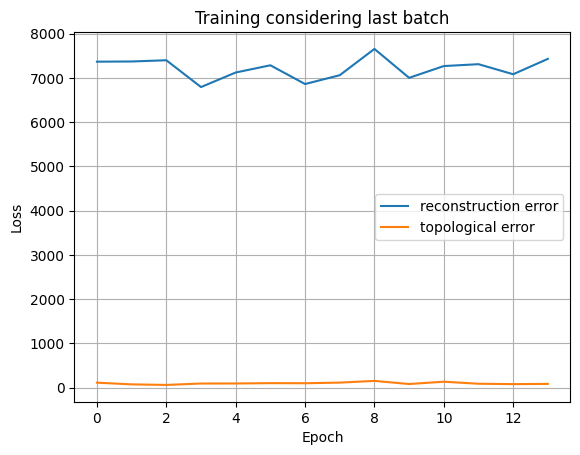

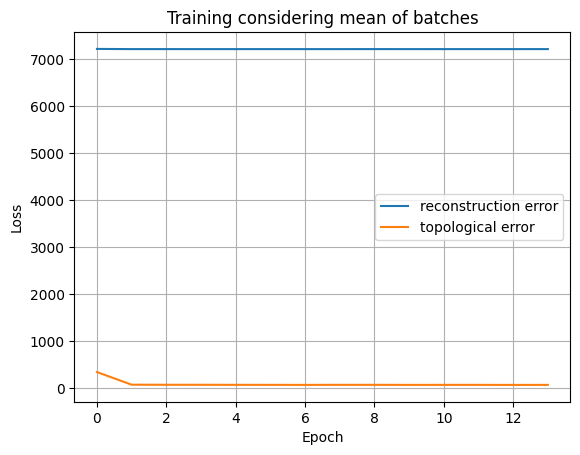

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


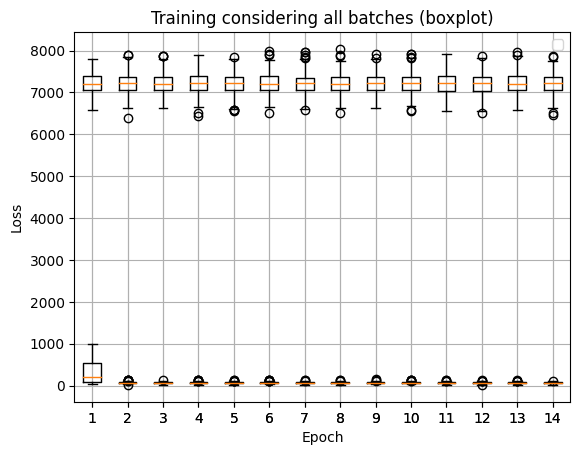

AssertionError: 

In [10]:
transform_topoae = TopologicalDimensionalityReduction(ae_model='DeepAE')
transform_topoae.fit(mnist_dataset_train.X)
assert 1==0

In [ ]:
test_applied_topoae = transform_topoae.transform(mnist_dataset_test.X)

In [ ]:
print(test_applied_topoae.shape)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=128)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=500)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=1000)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)